In [1]:
import logging
import os.path as osp

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import torch
from scipy.linalg import eigh, svd
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from torch_geometric.data import Data

from ogw.gw_bary import optim_C_gw_v2
from ogw.gwtil_bary import optim_C_gwtil_lb_v2, optim_C_gwtil_ub_v2
from ogw.mnist_utils import read_file, process_graph, solve_X


## Point Cloud MNIST 2D Samples

* download [MNIST 2D](https://www.kaggle.com/cristiangarcia/pointcloudmnist2d) from Kaggle.
* specify your own `ROOT` folder 

In [2]:
digit = 9
S = 5
np.random.rand(0)
logging.basicConfig(format='%(asctime)s - %(message)s ', level=logging.INFO)
ROOT = osp.join(osp.expanduser("~"), "tmp", "data", "MNIST_2D")
X, y = read_file(osp.join(ROOT, "test.csv"))
# print(X.shape, y.shape)
lambdas = np.ones(S) / S

filter_idx = np.where(y == digit)[0][:S]
Gs, Ss, Ds, ps = process_graph(X[filter_idx], 200)

N = min(Ss)
p = np.ones(N) / N

# init X from the sample
logging.info(f"point sizes {Ss}")
min_idx = np.argmin(Ss)
# min_idx = np.where(y == digit)[0][S+1]
# sample_idx = np.where(y == digit)[0][S+1]


2022-02-24 14:46:29,926 - point sizes [62, 99, 68, 70, 88] 


2022-02-24 14:46:29,998 - plot graph 


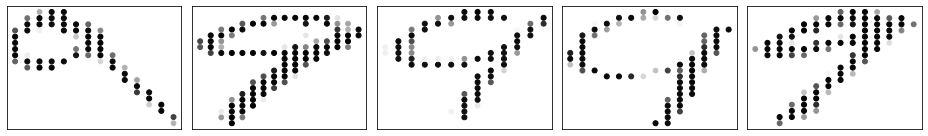

In [3]:
logging.info("plot graph")
fig = plt.figure(figsize=(2 * S + 3, 2), tight_layout=True)
for i in range(S):
    plt.subplot(1, S, i + 1)
    size = np.array(list(nx.get_node_attributes(Gs[i], "value").values())) / 10
    color = size
    nx.draw(Gs[i], nx.get_node_attributes(Gs[i], 'pos'), node_color=color, node_size=size, cmap="Greys")
    plt.axis('on')
# plt.show()
plt.savefig(f"barycenter_mnist_{digit}_samples.pdf")


## Solve Barycenter Problem under different metric

2022-02-24 14:46:30,673 - solve C with digit 9 under GW 
/home/hjin25/miniconda3/envs/pyg/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()
/home/hjin25/miniconda3/envs/pyg/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


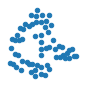

In [4]:
# GW
logging.info(f"solve C with digit {digit} under GW")
C = optim_C_gw_v2(N, Ds, ps, p, lambdas, loss_fun="square_loss")
X = solve_X(C, method="eig")
fig = plt.figure(figsize=(1, 1), tight_layout=True)
G2 = nx.Graph()
for i in range(N):
    G2.add_node(i, pos=X[i])
nx.draw(G2, nx.get_node_attributes(G2, 'pos'), cmap="Greys", node_size=20)
# plt.axis("on")
plt.savefig(f"barycenter_mnist_{digit}_gw.pdf")

2022-02-24 14:46:31,877 - solve C with digit 9 under OGW_lb 
/home/hjin25/miniconda3/envs/pyg/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


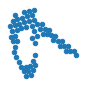

In [5]:
# OGW_lb
logging.info(f"solve C with digit {digit} under OGW_lb")
C = optim_C_gwtil_lb_v2(N, Ds, ps, p, lambdas, C_init=Ds[min_idx])
X = solve_X(C, method="eig")
fig = plt.figure(figsize=(1, 1), tight_layout=True)
G2 = nx.Graph()
for i in range(N):
    G2.add_node(i, pos=X[i])
nx.draw(G2, nx.get_node_attributes(G2, 'pos'), cmap="Greys", node_size=20)
# plt.axis("on")
plt.savefig(f"barycenter_mnist_{digit}_ogw_lb.pdf")


2022-02-24 14:46:32,120 - solve C with digit 9 under OGW_ub 
/home/hjin25/miniconda3/envs/pyg/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


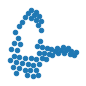

In [6]:
# OGW_ub
logging.info(f"solve C with digit {digit} under OGW_ub")
C = optim_C_gwtil_ub_v2(N, Ds, ps, p, lambdas, C_init=Ds[min_idx])
X = solve_X(C, method="eig")
fig = plt.figure(figsize=(1, 1), tight_layout=True)
G2 = nx.Graph()
for i in range(N):
    G2.add_node(i, pos=X[i])
nx.draw(G2, nx.get_node_attributes(G2, 'pos'), cmap="Greys", node_size=20)
# plt.axis("on")
plt.savefig(f"barycenter_mnist_{digit}_ogw_ub.pdf")
